# Basic Unet on channels

(-0.5, 499.5, 499.5, -0.5)

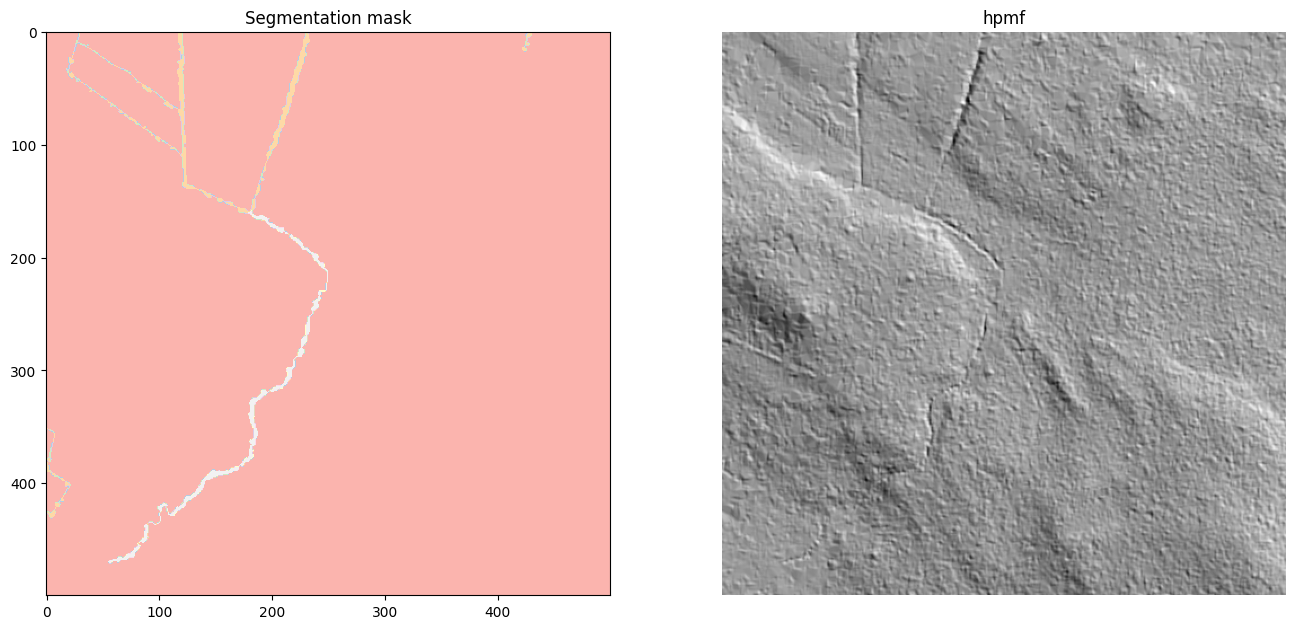

In [1]:
import glob
import matplotlib.pyplot as plt
import tifffile
import numpy as np

plt.rcParams['figure.figsize'] = [16, 16]


labels = glob.glob('/workspace/data/ditches/training/3labels/*.tif')
#hpmf = glob.glob('/workspace/data/ditches/training/hpmf/*.tif')
hpmf = glob.glob('/workspace/data/ditches/training/h45/*.tif')


i = 12

f, axarr = plt.subplots(1,2)
axarr[0].set_title("Segmentation mask")
axarr[0].imshow(tifffile.imread(labels[i]), cmap='Pastel1')

axarr[1].set_title("hpmf")
axarr[1].imshow(tifffile.imread(hpmf[i]), cmap='gray')

plt.axis('off')
#plt.savefig('C:/william/writing/Trapping_pits/images/chips'+".png",dpi=(400), bbox_inches='tight')

In [47]:
labels[i]

'/workspace/data/ditches/training/3labels/18E023_68900_6125_25_0026.tif'

# Train a basic UNet

In [73]:
!python /workspace/code/semantic_segmentation/train.py -I /workspace/data/ditches/training/h45/ /workspace/data/ditches/training/3labels/ /workspace/data/logfiles/mariana/basic_unet5 UNet --seed=1 --epochs=20 --batch_size=32 --classes=0,1,2 --weighting="focal"
!python /workspace/code/semantic_segmentation/train.py -I /workspace/data/ditches/training/h45/ /workspace/data/ditches/training/3labels/ /workspace/data/logfiles/mariana/basic_unet6 UNet --seed=2 --epochs=20 --batch_size=32 --classes=0,1,2 --weighting="focal"
!python /workspace/code/semantic_segmentation/train.py -I /workspace/data/ditches/training/h45/ /workspace/data/ditches/training/3labels/ /workspace/data/logfiles/mariana/basic_unet7 UNet --seed=3 --epochs=20 --batch_size=32 --classes=0,1,2 --weighting="focal"
!python /workspace/code/semantic_segmentation/train.py -I /workspace/data/ditches/training/h45/ /workspace/data/ditches/training/3labels/ /workspace/data/logfiles/mariana/basic_unet8 UNet --seed=4 --epochs=20 --batch_size=32 --classes=0,1,2 --weighting="focal"

2023-05-30 10:42:41.458671: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 10:42:45.552799: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-30 10:42:45.555854: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-30 10:42:45.556091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning

# Plot loss curves

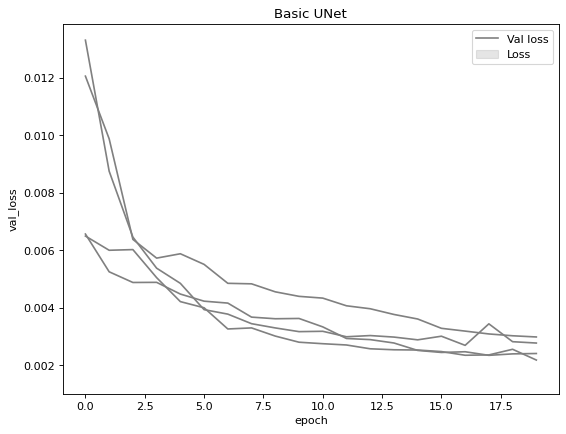

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

df1 = pd.read_csv('/workspace/data/logfiles/mariana/basic_unet1/log.csv', sep =';')
df2 = pd.read_csv('/workspace/data/logfiles/mariana/basic_unet2/log.csv', sep =';')
df3 = pd.read_csv('/workspace/data/logfiles/mariana/basic_unet3/log.csv', sep =';')
df4 = pd.read_csv('/workspace/data/logfiles/mariana/basic_unet4/log.csv', sep =';')
sns.lineplot(data=df1, x='epoch', y='val_loss', color="grey")
sns.lineplot(data=df2, x='epoch', y='val_loss', color="grey")
sns.lineplot(data=df3, x='epoch', y='val_loss', color="grey")
sns.lineplot(data=df4, x='epoch', y='val_loss', color="grey")

plt.title('Basic UNet')
plt.legend(labels=['Val loss', 'Loss'])
plt.ylim(0.001)
#plt.xlim(0,100)
plt.show()

# Evaluate model

In [77]:
%%capture
!python /workspace/code/semantic_segmentation/evaluate.py -I /workspace/data/ditches/testing/h45/ /workspace/data/ditches/testing/3labels/ /workspace/data/logfiles/mariana/basic_unet1/trained.h5 UNet /workspace/data/logfiles/mariana/basic_unet1/test.csv --classes=0,1,2
!python /workspace/code/semantic_segmentation/evaluate.py -I /workspace/data/ditches/testing/h45/ /workspace/data/ditches/testing/3labels/ /workspace/data/logfiles/mariana/basic_unet2/trained.h5 UNet /workspace/data/logfiles/mariana/basic_unet2/test.csv --classes=0,1,2
!python /workspace/code/semantic_segmentation/evaluate.py -I /workspace/data/ditches/testing/h45/ /workspace/data/ditches/testing/3labels/ /workspace/data/logfiles/mariana/basic_unet3/trained.h5 UNet /workspace/data/logfiles/mariana/basic_unet3/test.csv --classes=0,1,2
!python /workspace/code/semantic_segmentation/evaluate.py -I /workspace/data/ditches/testing/h45/ /workspace/data/ditches/testing/3labels/ /workspace/data/logfiles/mariana/basic_unet4/trained.h5 UNet /workspace/data/logfiles/mariana/basic_unet4/test.csv --classes=0,1,2

In [121]:
import pandas as pd
import numpy as np
eval = pd.read_csv('/workspace/data/logfiles/mariana/basic_unet4/test.csv')
TP = np.longdouble(eval['2_tp'].sum())
FP = np.longdouble(eval['2_fp'].sum())
TN = np.longdouble(eval['2_tn'].sum())
FN = np.longdouble(eval['2_fn'].sum())

MCC = ((TP*TN) - (FP*FN)) / np.sqrt((TP+FP) * (TP+FN) * (TN+FN) * (TN+FN))
MCC

/tmp/ipykernel_3508271/3920128016.py:9: RuntimeWarning: invalid value encountered in longdouble_scalars
  MCC = ((TP*TN) - (FP*FN)) / np.sqrt((TP+FP) * (TP+FN) * (TN+FN) * (TN+FN))


nan

In [ ]:
0.58
0.62
0.64
0.55

In [85]:
eval_df = pd.read_csv('/workspace/data/logfiles/mariana/basic_unet4/test.csv')

In [86]:
eval_df.describe()

,0_fmes,0_acc,0_rec,0_jacc,0_tp,0_fp,0_tn,0_fn,1_fmes,1_acc,...,1_tn,1_fn,2_fmes,2_acc,2_rec,2_jacc,2_tp,2_fp,2_tn,2_fn
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,...,919.000000,919.000000,919.0,919.000000,919.0,919.0,919.0,919.0,919.000000,919.000000
mean,0.995343,0.990822,0.997720,0.990751,246312.722524,1733.212187,1392.895539,561.169750,0.430640,0.991300,...,246516.561480,1529.373232,0.0,0.998847,0.0,0.0,0.0,0.0,249711.759521,288.240479
std,0.003305,0.006434,0.002115,0.006515,2658.813973,1461.473874,1446.366776,520.552871,0.264064,0.006631,...,2724.197638,1513.776559,0.0,0.002694,0.0,0.0,0.0,0.0,673.406063,673.406063
min,0.974931,0.951556,0.984686,0.951088,233823.000000,55.000000,0.000000,0.000000,0.000000,0.951556,...,233823.000000,0.000000,0.0,0.982100,0.0,0.0,0.0,0.0,245525.000000,0.000000
25%,0.993798,0.987738,0.996991,0.987673,244824.500000,687.500000,300.500000,213.500000,0.212482,0.988176,...,244998.500000,453.500000,0.0,1.000000,0.0,0.0,0.0,0.0,250000.000000,0.000000
50%,0.996079,0.992220,0.998234,0.992188,247000.000000,1350.000000,981.000000,434.000000,0.485282,0.992800,...,247240.000000,1132.000000,0.0,1.000000,0.0,0.0,0.0,0.0,250000.000000,0.000000
75%,0.997731,0.995502,0.999142,0.995473,248355.500000,2287.500000,2001.500000,742.000000,0.649128,0.996150,...,248569.500000,2113.000000,0.0,1.000000,0.0,0.0,0.0,0.0,250000.000000,0.000000
max,0.999649,0.999300,1.000000,0.999298,249735.000000,11363.000000,9123.000000,3809.000000,0.901460,1.000000,...,250000.000000,11363.000000,0.0,1.000000,0.0,0.0,0.0,0.0,250000.000000,4475.000000


# Train Exception UNet

In [7]:
!python /workspace/code/semantic_segmentation/train.py -I /workspace/data/ditches/training/hpmf/ /workspace/data/ditches/training/labels/ /workspace/data/logfiles/mariana/XceptionUNet5 XceptionUNet --seed=1 --epochs=50 --batch_size=32 --classes=0,1 --weighting="focal"
!python /workspace/code/semantic_segmentation/train.py -I /workspace/data/ditches/training/hpmf/ /workspace/data/ditches/training/labels/ /workspace/data/logfiles/mariana/XceptionUNet6 XceptionUNet --seed=2 --epochs=50 --batch_size=32 --classes=0,1 --weighting="focal"
!python /workspace/code/semantic_segmentation/train.py -I /workspace/data/ditches/training/hpmf/ /workspace/data/ditches/training/labels/ /workspace/data/logfiles/mariana/XceptionUNet7 XceptionUNet --seed=3 --epochs=50 --batch_size=32 --classes=0,1 --weighting="focal"
!python /workspace/code/semantic_segmentation/train.py -I /workspace/data/ditches/training/hpmf/ /workspace/data/ditches/training/labels/ /workspace/data/logfiles/mariana/XceptionUNet8 XceptionUNet --seed=4 --epochs=50 --batch_size=32 --classes=0,1 --weighting="focal"

2023-06-23 11:11:23.620405: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-23 11:11:26.578332: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-23 11:11:26.580359: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-23 11:11:26.580496: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning

# Evaluate the Exception model

In [ ]:
%%capture
!python /workspace/code/semantic_segmentation/evaluate.py -I /workspace/data/ditches/testing/h45/ /workspace/data/ditches/testing/3labels/ /workspace/data/logfiles/mariana/XceptionUNet1/trained.h5 XceptionUNet /workspace/data/logfiles/mariana/XceptionUNet1/test.csv --classes=0,1,2
!python /workspace/code/semantic_segmentation/evaluate.py -I /workspace/data/ditches/testing/h45/ /workspace/data/ditches/testing/3labels/ /workspace/data/logfiles/mariana/XceptionUNet2/trained.h5 XceptionUNet /workspace/data/logfiles/mariana/XceptionUNet2/test.csv --classes=0,1,2
!python /workspace/code/semantic_segmentation/evaluate.py -I /workspace/data/ditches/testing/h45/ /workspace/data/ditches/testing/3labels/ /workspace/data/logfiles/mariana/XceptionUNet3/trained.h5 XceptionUNet /workspace/data/logfiles/mariana/XceptionUNet3/test.csv --classes=0,1,2
!python /workspace/code/semantic_segmentation/evaluate.py -I /workspace/data/ditches/testing/h45/ /workspace/data/ditches/testing/3labels/ /workspace/data/logfiles/mariana/XceptionUNet4/trained.h5 XceptionUNet /workspace/data/logfiles/mariana/XceptionUNet4/test.csv --classes=0,1,2

In [122]:
import pandas as pd
import numpy as np
eval = pd.read_csv('/workspace/data/logfiles/mariana/XceptionUNet4/test.csv')
TP = np.longdouble(eval['2_tp'].sum())
FP = np.longdouble(eval['2_fp'].sum())
TN = np.longdouble(eval['2_tn'].sum())
FN = np.longdouble(eval['2_fn'].sum())

MCC = ((TP*TN) - (FP*FN)) / np.sqrt((TP+FP) * (TP+FN) * (TN+FN) * (TN+FN))
MCC

0.093589395910369989864

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

df1 = pd.read_csv('/workspace/data/logfiles/mariana/XceptionUNet5/log.csv', sep =';')
df2 = pd.read_csv('/workspace/data/logfiles/mariana/XceptionUNet6/log.csv', sep =';')
df3 = pd.read_csv('/workspace/data/logfiles/mariana/XceptionUNet7/log.csv', sep =';')
df4 = pd.read_csv('/workspace/data/logfiles/mariana/XceptionUNet8/log.csv', sep =';')

sns.lineplot(data=df1, x='epoch', y='val_loss', color="grey")
sns.lineplot(data=df2, x='epoch', y='val_loss', color="grey")
sns.lineplot(data=df3, x='epoch', y='val_loss', color="grey")
sns.lineplot(data=df4, x='epoch', y='val_loss', color="grey")

plt.title('Exception UNet focal loss')
plt.legend(labels=['Val loss', 'Loss'])
#plt.ylim(0.1)
#plt.xlim(0,100)
plt.show()

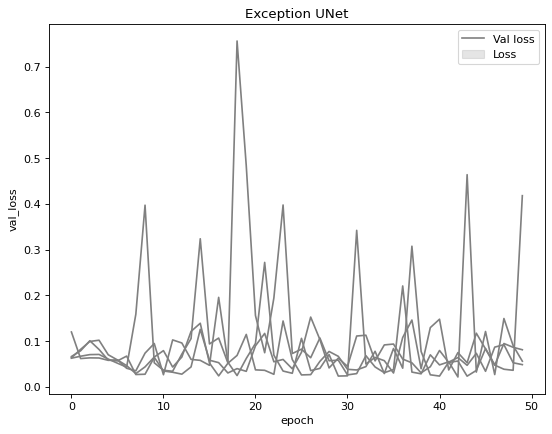

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

df1 = pd.read_csv('/workspace/data/logfiles/mariana/XceptionUNet1/log.csv', sep =';')
df2 = pd.read_csv('/workspace/data/logfiles/mariana/XceptionUNet2/log.csv', sep =';')
df3 = pd.read_csv('/workspace/data/logfiles/mariana/XceptionUNet3/log.csv', sep =';')
df4 = pd.read_csv('/workspace/data/logfiles/mariana/XceptionUNet4/log.csv', sep =';')

sns.lineplot(data=df1, x='epoch', y='val_loss', color="grey")
sns.lineplot(data=df2, x='epoch', y='val_loss', color="grey")
sns.lineplot(data=df3, x='epoch', y='val_loss', color="grey")
sns.lineplot(data=df4, x='epoch', y='val_loss', color="grey")

plt.title('Exception UNet mfb')
plt.legend(labels=['Val loss', 'Loss'])
#plt.ylim(0.1)
#plt.xlim(0,100)
plt.show()

In [ ]:
0.43
0.41
0.47
0.46

# Train basic unet on LiDAR server

In [ ]:
!python /workspace/code/semantic_segmentation/train.py -I /workspace/data/ditches/training/h45/ /workspace/data/ditches/training/3labels/ /workspace/data/logfiles/mariana/basic_unet5 UNet --seed=1 --epochs=20 --batch_size=32 --classes=0,1,2 --weighting="focal"

2023-06-01 08:07:54.354953: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-01 08:07:54.404802: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


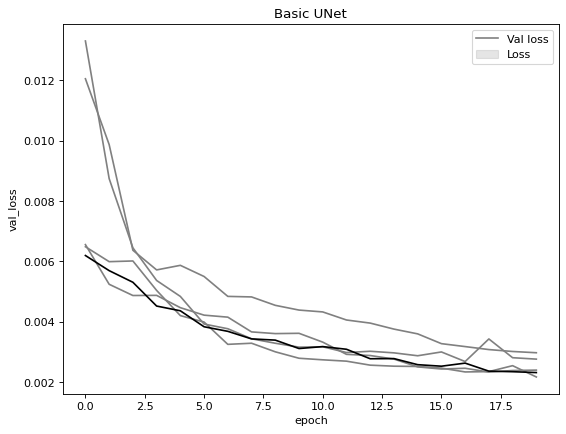

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

df1 = pd.read_csv('/workspace/data/logfiles/mariana/basic_unet1/log.csv', sep =';')
df2 = pd.read_csv('/workspace/data/logfiles/mariana/basic_unet2/log.csv', sep =';')
df3 = pd.read_csv('/workspace/data/logfiles/mariana/basic_unet3/log.csv', sep =';')
df4 = pd.read_csv('/workspace/data/logfiles/mariana/basic_unet4/log.csv', sep =';')
df5 = pd.read_csv('/workspace/data/logfiles/mariana/basic_unet5/log.csv', sep =';')
sns.lineplot(data=df1, x='epoch', y='val_loss', color="grey")
sns.lineplot(data=df2, x='epoch', y='val_loss', color="grey")
sns.lineplot(data=df3, x='epoch', y='val_loss', color="grey")
sns.lineplot(data=df4, x='epoch', y='val_loss', color="grey")
sns.lineplot(data=df5, x='epoch', y='val_loss', color="black")

plt.title('Basic UNet')
plt.legend(labels=['Val loss', 'Loss'])
#plt.ylim(0,01)
#plt.xlim(0,100)
plt.show()